# Anomalies of the Equatorial Ionosphere I
#### By Amadi Brians C.
##### bamadi@brianspace.org

In [1]:
#=========== Import Packages =============
    
import os
import glob
import shutil
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
import cartopy.crs as ccrs
from netCDF4 import Dataset 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy.feature as cfeature
from netCDF4 import date2num, num2date
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

#### Equatorial Electrojet (EEJ)
- The anomaly to be discussed in this section is the Equatorial Electrojet (EEJ).
- Assuming you are at an altitude between 90 and 110 km and within the equatorial ionosphere, specifically, between about $\pm3^o$ magnetic latitude. If holding a current measuring meter, you may observe an increase in the ionospheric current. This current is usually oriented eastward and is called the Equatorial Electrojet (EEJ). The term jet is used to describe its narrow structure. Figure 5.1 shows this narrow strip of intense current.

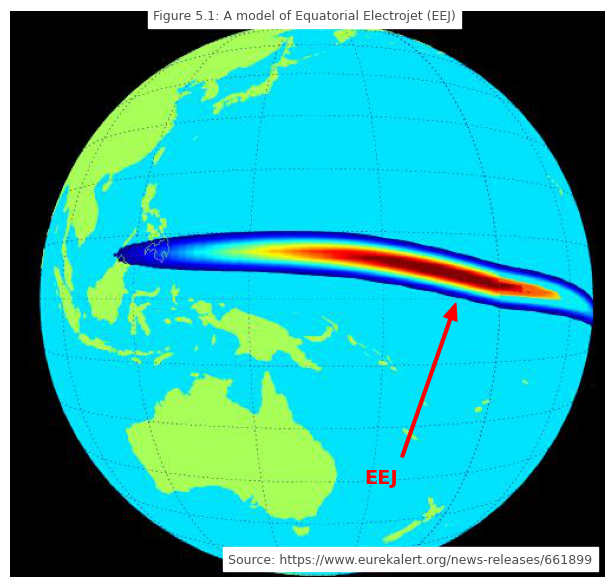

In [2]:
# ====== Importing an image of EEJ =======

# Load and crop the image
img = mpimg.imread('../images/EEJ.jpg')

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img[0:480, 0:780])  # Crop region
ax.axis('off')

# === Add source text (anchored at bottom-right) ===
ax.text(
    0.98, 0.02,
    "Source: https://www.eurekalert.org/news-releases/661899",
    color='black',
    fontsize=9,
    ha='right', va='bottom',
    transform=ax.transAxes,
    backgroundcolor='white',
    alpha=0.7
)

# === Add title text (anchored at top center) ===
ax.text(
    0.75, 0.98,
    "Figure 5.1: A model of Equatorial Electrojet (EEJ)",
    color='black',
    fontsize=9,
    ha='right', va='bottom',
    transform=ax.transAxes,
    backgroundcolor='white',
    alpha=0.7
)

# === Add arrow pointing to the red jet-like feature ===
# (Adjust coordinates to match your image feature)
ax.annotate(
    "EEJ",                            # label
    xy=(380, 240),                    # arrow tip (target point on the red jet)
    xytext=(300, 400),                # text position (where "EEJ" will be)
    color='red',
    fontsize=14,
    fontweight='bold',
    arrowprops=dict(
        facecolor='red',
        edgecolor='red',
        shrink=0.05,
        width=2,
        headwidth=10
    )
)

plt.tight_layout()
plt.show()

#### Source of EEJ

- The cause of EEJ is the distribution of ionospsheric conductivity. I will explain this concept of conductivity briefly.

- Conductivity in the ionosphere is either called Hall, Parallel or Pedersen, depending on their orientation with respect to the electric and magnetic fields.

- If conductivity is oriented in a direction perpendicular to both fields (**E** and **B**), then it is referred to as Hall, $\sigma_H$, but if it is perpendicular to magnetic but parallel to the **E**, $\sigma_P$, then it is defined as Pedersen. On the other hand, if conductivity is parallel to **B**, it is called Parallel or Longitudinal, $\sigma_{||}$.

- A peculiar kind of conductivity that arises from the combined effect of $\sigma_H$ and $\sigma_P$ is the **Cowling conductivity**, $\sigma_c$. This conductivity is responsible for the intense ionospheric current called EEJ. The orientation of these conductivities are illustrated in Figure 5.2.

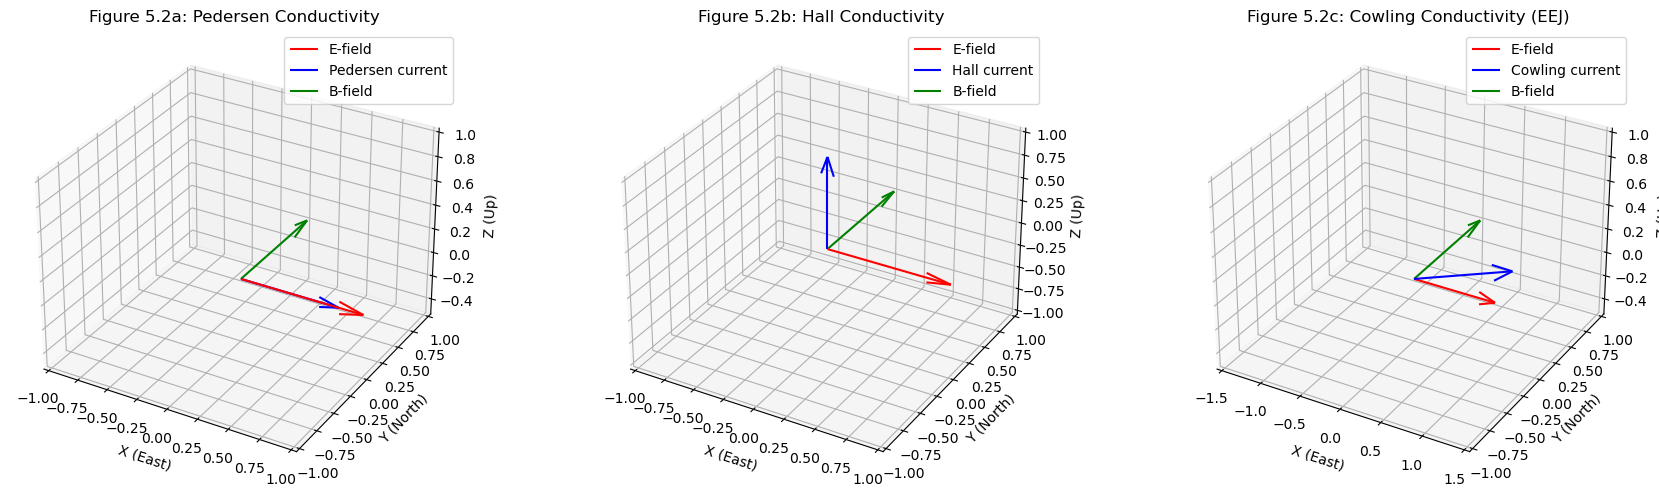

In [3]:
# Create figure with 3 subplots
fig = plt.figure(figsize=(18, 5))

# Define a common origin
origin = np.array([0, 0, 0])

# Define E and B vectors (arbitrary scale)
E = np.array([1, 0, 0])  # Eastward
B = np.array([0, 1, 0])  # Northward (along magnetic equator)

# Pedersen current: along E (parallel to E)
ax1 = fig.add_subplot(131, projection='3d')
ax1.quiver(*origin, *E, color='r', label='E-field', arrow_length_ratio=0.2)
Jp = np.array([0.8, 0, 0])  # Pedersen along E
ax1.quiver(*origin, *Jp, color='b', label='Pedersen current', arrow_length_ratio=0.2)
ax1.quiver(*origin, *B, color='g', label='B-field', arrow_length_ratio=0.2)
ax1.set_title('Figure 5.2a: Pedersen Conductivity')
ax1.set_xlim([-1,1]); ax1.set_ylim([-1,1]); ax1.set_zlim([-0.5,1])
ax1.set_xlabel('X (East)'); ax1.set_ylabel('Y (North)'); ax1.set_zlabel('Z (Up)')
ax1.legend()

# Hall current: perpendicular to both E and B
ax2 = fig.add_subplot(132, projection='3d')
ax2.quiver(*origin, *E, color='r', label='E-field', arrow_length_ratio=0.2)
JH = np.cross(E, B)  # Hall current direction
ax2.quiver(*origin, *JH, color='b', label='Hall current', arrow_length_ratio=0.2)
ax2.quiver(*origin, *B, color='g', label='B-field', arrow_length_ratio=0.2)
ax2.set_title('Figure 5.2b: Hall Conductivity')
ax2.set_xlim([-1,1]); ax2.set_ylim([-1,1]); ax2.set_zlim([-1,1])
ax2.set_xlabel('X (East)'); ax2.set_ylabel('Y (North)'); ax2.set_zlabel('Z (Up)')
ax2.legend()

# Cowling current: enhanced eastward current along Pedersen + Hall compensation
ax3 = fig.add_subplot(133, projection='3d')
ax3.quiver(*origin, *E, color='r', label='E-field', arrow_length_ratio=0.2)
Jc = np.array([1.2, 0, 0.3])  # Cowling is enhanced along E with small Z tilt
ax3.quiver(*origin, *Jc, color='b', label='Cowling current', arrow_length_ratio=0.2)
ax3.quiver(*origin, *B, color='g', label='B-field', arrow_length_ratio=0.2)
ax3.set_title('Figure 5.2c: Cowling Conductivity (EEJ)')
ax3.set_xlim([-1.5,1.5]); ax3.set_ylim([-1,1]); ax3.set_zlim([-0.5,1])
ax3.set_xlabel('X (East)'); ax3.set_ylabel('Y (North)'); ax3.set_zlabel('Z (Up)')
ax3.legend()

plt.tight_layout()
plt.show()


#### Source of $\sigma_c$

- The equation of motion of charged particles depends on electric (or electrostatic), magnetic (Lorentz), and collisional, $m_s \nu_s \mathbf{v}_s$, forces. The sum of these forces can be written as:

```{math}
:label: eq1
F_s = m\frac{dv_s}{dt} = q_s(\mathbf{E} + \mathbf{v}_s \times \mathbf{B}) - m_s \nu_s \mathbf{v}_s

- Note: $q_s(\mathbf{E})$, $q_s(\mathbf{v}_s \times \mathbf{B})$, and $m_s \nu_s \mathbf{v}_s$ are the electrostatic, magnetic (Lorentz), and frictional (collisional) forces respectively.

- Can you guess why the negative sign appears before the frictional force?

- The force equation can be rewritten as:

```{math}
:label: eq2
m_s \frac{d\mathbf{v}_s}{dt} = q_s(\mathbf{E} + \mathbf{v}_s \times \mathbf{B}) - m_s \nu_s \mathbf{v}_s


- Assuming steady-state:

```{math}
:label: eq3
\frac{d\mathbf{v}_s}{dt} = 0


- Therefore:

```{math}
:label: eq4
0 = q_s(\mathbf{E} + \mathbf{v}_s \times \mathbf{B}) - m_s \nu_s \mathbf{v}_s


For **B** $=$ $B\hat{\textbf{z}}$, the components are:

```{math}
:label: eq5
\begin{aligned}
m_s \nu_s v_{s,x} &= q_s(E_x + v_{s,y} B) \
m_s \nu_s v_{s,y} &= q_s(E_y - v_{s,x} B)
\end{aligned}


You can obtain eq5 from the matrix below:

```{math}
:label: eq5
\begin{aligned}
m_s \nu_s v_{s,x} &= q_s(E_x + v_{s,y} B) \\
m_s \nu_s v_{s,y} &= q_s(E_y - v_{s,x} B)
\end{aligned}


- A path to obtaining the current density and conductivity lies in the rate at which charged particles spiral around magnetic field lines. This rate of spiral is known as **gyrofrequency**. It is denoted by $\Omega$, and represented as:

```{math}
:label: eq7
\Omega_s = \frac{q_s B}{m_s}

Combining equations 5 and 7 gives the velocity components of charged particles.

```{math}    
:label: eq8
\begin{aligned}
v_{s,x} &= \frac{q_s}{m_s} \frac{\nu_s E_x + \Omega_s E_y}{\nu_s^2 + \Omega_s^2} \
v_{s,y} &= \frac{q_s}{m_s} \frac{\nu_s E_y - \Omega_s E_x}{\nu_s^2 + \Omega_s^2}
\end{aligned}

- By definition, current density, $\textbf{J}$, is given as:

```{math}
:label: eq9
J = n_s q_s v_s

- Hence,

```{math}
:label: eq10
\begin{aligned}
J_{s,x} &= n_s q_s v_{s,x} \
J_{s,y} &= n_s q_s v_{s,y}
\end{aligned}

- By simple substitution of equations 8 into 10, we obtain an interesting represention of the current density in the x and y directions:

```{math}
:label: eq11
\begin{aligned}
J_{s,x} &= n_s \frac{q_s^2}{m_s} \frac{\nu_s E_x + \Omega_s E_y}{\nu_s^2 + \Omega_s^2} \
J_{s,y} &= n_s \frac{q_s^2}{m_s} \frac{\nu_s E_y - \Omega_s E_x}{\nu_s^2 + \Omega_s^2}
\end{aligned}

- In the previous conversations, we show that the flow of current affects the distribution of conductivity and vice versa. First, let's define the Pedersen, $\sigma_{P,s}$, and Hall conductivites, $\sigma_{H,s}$.

```{math}
:label: eq12
\begin{aligned}
\sigma_{P,s} &= n_s \frac{q_s^2}{m_s} \frac{\nu_s}{\nu_s^2 + \Omega_s^2} \\
\sigma_{H,s} &= n_s \frac{q_s^2}{m_s} \frac{\Omega_s}{\nu_s^2 + \Omega_s^2}
\end{aligned}


- This means that equation 11 can be written in terms of these conductivities, as follows:

```{math}
:label: eq13
\begin{aligned}
J_{s,x} &= \sigma_{P,s} E_x + \sigma_{H,s} E_y \
J_{s,y} &= -\sigma_{H,s} E_x + \sigma_{P,s} E_y
\end{aligned}

- Note: The equations in 13 were obtained by substituting equations 12 into 11.

- The aforementioned equations are for a single specie of charged particles. However, to obtain the effect of all particles, the conductivity of the species will be integrated (summed) over all species. That is,


```{math}
:label: eq14
\begin{aligned}
\sigma_P &= \sum_s \sigma_{P,s}, \quad \sigma_H = \sum_s \sigma_{H,s} \\
J_x &= \sigma_P E_x + \sigma_H E_y \\
J_y &= -\sigma_H E_x + \sigma_P E_y
\end{aligned}


- Current density can be written in matrix form as follows:

```{math}
:label: eq15
\begin{bmatrix} 
J_x \\ 
J_y 
\end{bmatrix}
=
\begin{bmatrix} 
\sigma_P & \sigma_H \\ 
-\sigma_H & \sigma_P 
\end{bmatrix}
\begin{bmatrix} 
E_x \\ 
E_y 
\end{bmatrix}

I hope this is not confusing. If confused, hit my email.

-Now, lets obtain the Zonal (eastward) current density, $\textbf{J}_x$.

At the magnetic equator, due to northward current closure: $J_y = 0$

- Hence, equation 14b becomes:

```{math}
:label: eq15b
-\sigma_H E_x + \sigma_P E_y = 0

- Hence,

```{math}
:label: eq16
E_y = \frac{\sigma_H}{\sigma_P} E_x

- By simply substituting equation 16 into 14a, we get an extra conductivity term.

```{math}
:label: eq17
\begin{aligned}
J_x &= \sigma_P E_x + \sigma_H E_y \\
    &= \left( \sigma_P + \frac{\sigma_H^2}{\sigma_P} \right) E_x
\end{aligned}

- The terms within the bracket forms a more enhanced conductivity, known as **cowling conductivity**.

```{math}
:label: eq18
\sigma_C = \sigma_P + \frac{\sigma_H^2}{\sigma_P}

Hence, the intense eastward current, known as EEJ, is represented as follows:

```{math}
:label: eq19
J_x = \sigma_C E_x

#### References:
1. Eurico R. de Paula. (2021). Postgraduate Lecture notes on Space Geophysics [PowerPoint slides]. Instituto Nacional de Pesquisas Espaciais (INPE), Sao Jose dos Campos, Brazil.
2. Kelley, M. C. (2009). The Earth’s ionosphere: Plasma physics and electrodynamics (2nd ed.). Academic Press.